# Introduction and goals

In [1]:
# generic imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [2]:
%matplotlib inline
sns.set(palette='pastel')

# Simulated data
The first batch of tests are done starting from a set of simulated data.
Lets create 6 variants of datasets:
* n=100, p=15 of which 5 informative
* n=100, p=50 of which 5 informative and 5 not informative
* n=100, p=300 of which 5 informative and 5 not informative
* n=1000, p=15 of which 5 informative
* n=1000, p=50 of which 5 informative and 5 not informative
* n=1000, p=300 of which 5 informative and 5 not informative

In [10]:
def rf_test(n_trees, n_samples):
    feat = [10,200,500]
    rfeat=[0,10,10]

    for t in n_trees:
        for j, n in enumerate(n_samples):
            for i in range(0,len(feat)):
                X, y = make_classification(n_samples=n, n_features=feat[i], n_informative=6, n_redundant=rfeat[i], random_state=0, shuffle=False)
                rf = RandomForestClassifier(n_estimators=t, n_jobs=-1, oob_score=False, random_state=0)
                rf.fit(X, y)
                col = ['f'+str(i) for i in range(0,feat[i])]
                feat_importance = [t.feature_importances_ for t in rf.estimators_]
                df = pd.DataFrame(columns=col, data=feat_importance)
                maxcols=min(df.shape[1], 30)
                sns.boxplot(data=df.iloc[:, :maxcols], ax=axis[j][i])
                #sns.barplot(x=col, y=rf.feature_importances_, ax=axis[j][i])
                #axis[j][i].set_title('n={}, f={}, rf={}'.format(n, feat[i], redundant_feat[i]))

                plt.text(0.6, 0.8,'feat={}\nredundant feat={}'.format(feat[i], rfeat[i]), bbox=dict(facecolor='white', alpha=0.8), transform = axis[j][i].transAxes)

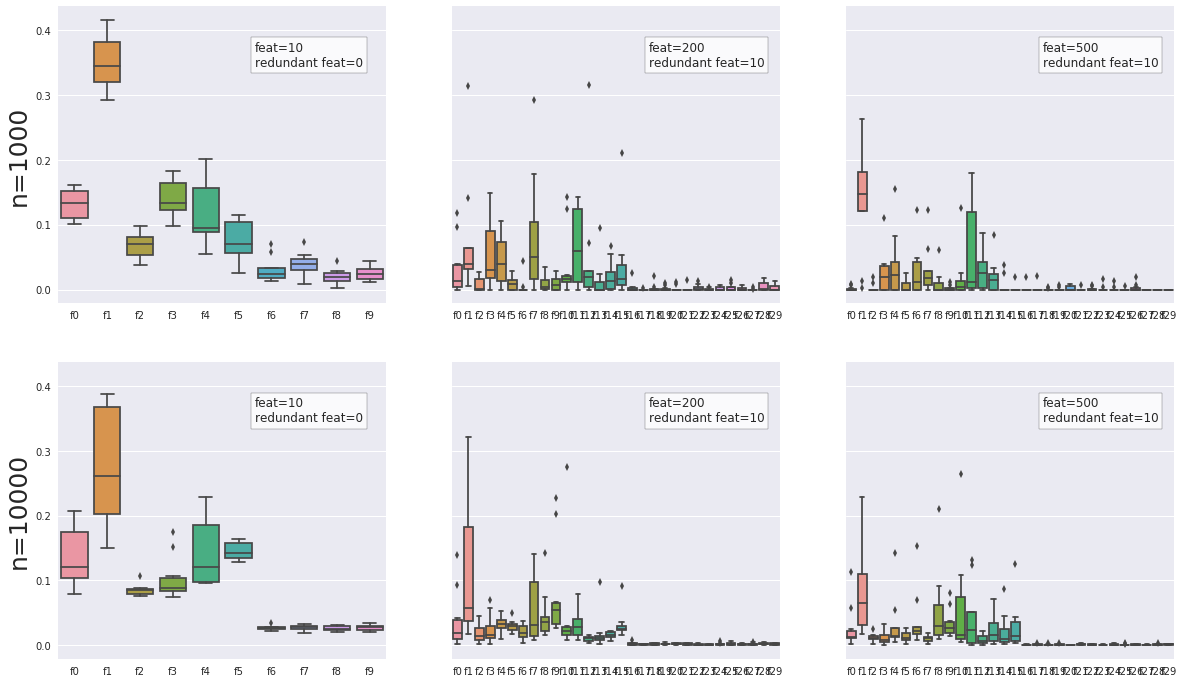

In [11]:
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(2, 3, sharey=True, figsize=(20, 12))
axis = [[ax1, ax2, ax3], [ax4, ax5, ax6]]
n_samples=[1000, 10000]
n_trees=[10]

rf_test(n_trees, n_samples)
for i,n in enumerate(n_samples):
    axis[i][0].set_ylabel('n={}'.format(n), rotation=90, size=25)

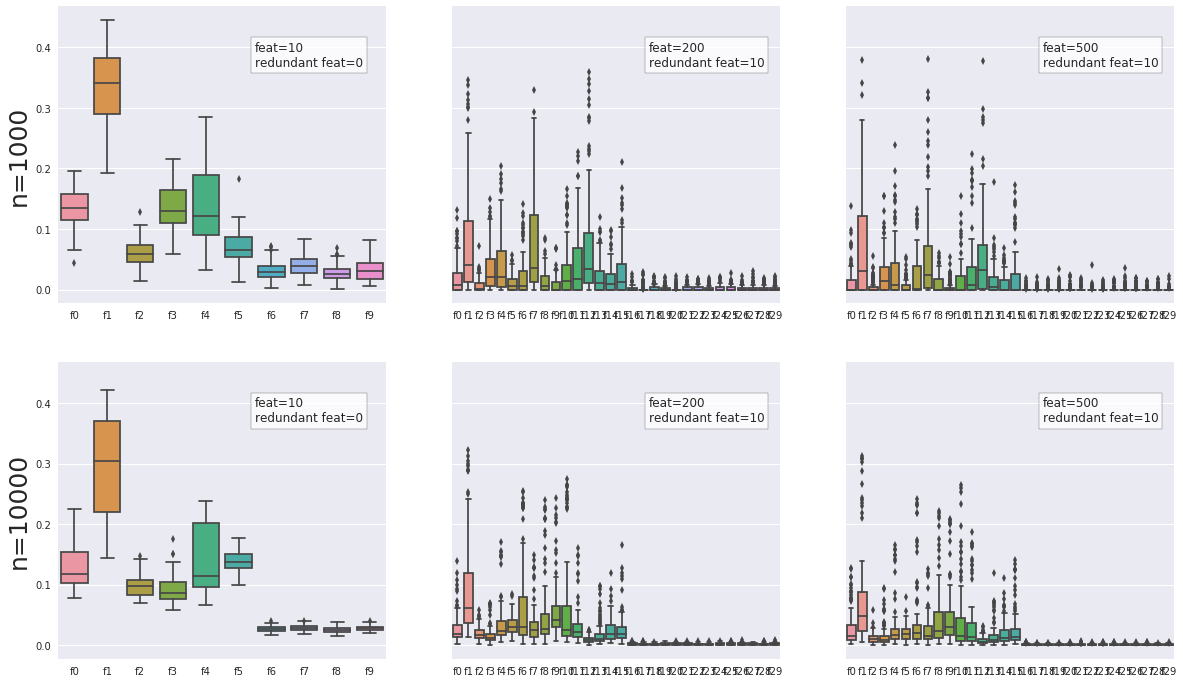

In [5]:
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(2, 3, sharey=True, figsize=(20, 12))
axis = [[ax1, ax2, ax3], [ax4, ax5, ax6]]

rf_test(100)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(20, 9))
sns.boxplot(data=df.iloc[:, :maxcols], ax=ax)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
#plt.text(0.9, 0.9,'n=10000\nfeat=200\nr_feat=10', bbox=dict(facecolor='red', alpha=0.5), transform = ax.transAxes, fontdict=font)

In [ ]:
min(30, df.shape[1])

In [ ]:
df1 = pd.DataFrame(columns=col, data=X_train)
cor = df1.corr()
sns.heatmap(cor)

In [ ]:
col = ['f'+str(i) for i in range(1,11)]
col

In [ ]:

df = pd.DataFrame(columns=col, data=boh)
df.head()

In [ ]:
df['f1'].mean()